Importing the necessary libraries

In [142]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import os

Loading the Dataset

In [143]:
df=pd.read_csv("C:/Users/Nikhil G/Downloads/mcdonalds.csv")

In [144]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


Performing EDA

In [145]:
df.shape

(1453, 15)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [147]:
df = df.drop(columns='Like')


In [148]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [149]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [150]:
#converting the object valuse into numerical values 
binary_map = {'Yes': 1, 'No': 0}

binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
                  'tasty', 'expensive', 'healthy', 'disgusting']

for col in binary_columns:
    df[col] = df[col].map(binary_map)


Visualizations of Data

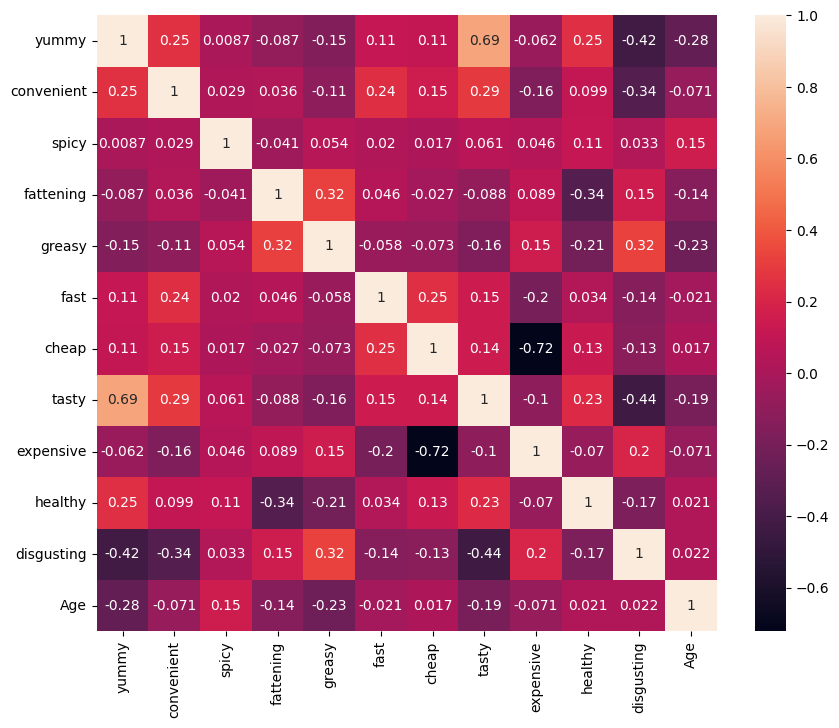

In [151]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

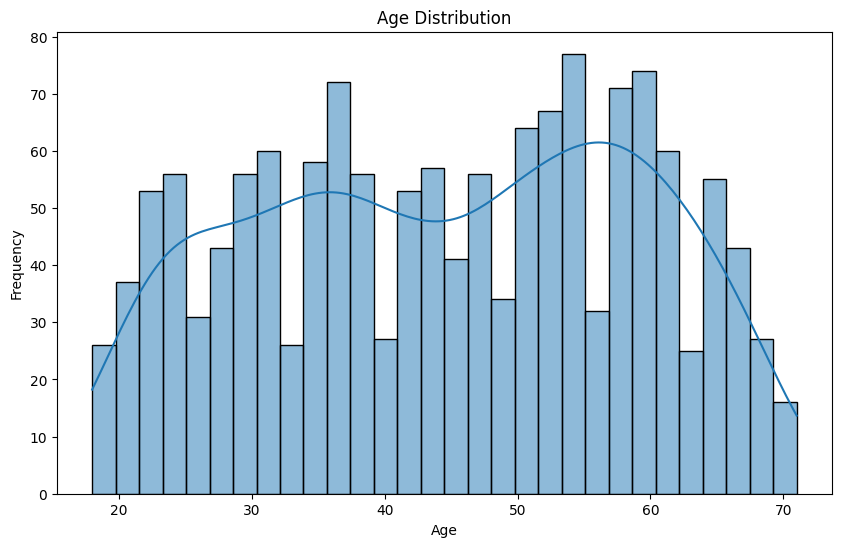

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

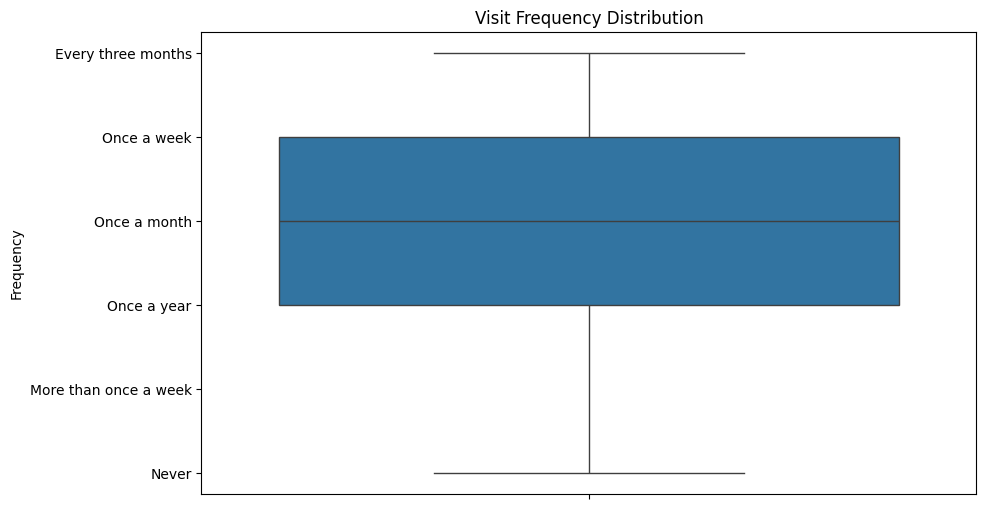

In [153]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['VisitFrequency'])
plt.title('Visit Frequency Distribution')
plt.ylabel('Frequency')
plt.show()

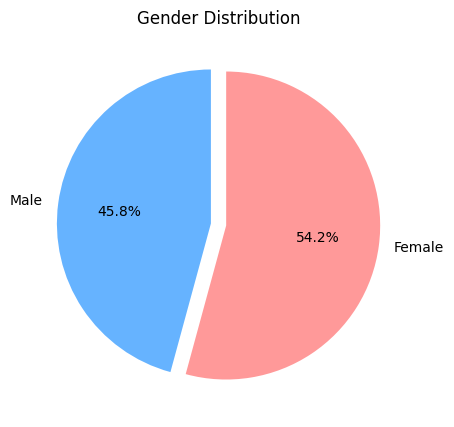

In [154]:
labels = ['Male', 'Female']
sizes = [df[df['Gender'] == 'Male'].shape[0], df[df['Gender'] == 'Female'].shape[0]]
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.05)

plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

#### Implementing Clustering Algoritms

K-Means Clustering Algoritms

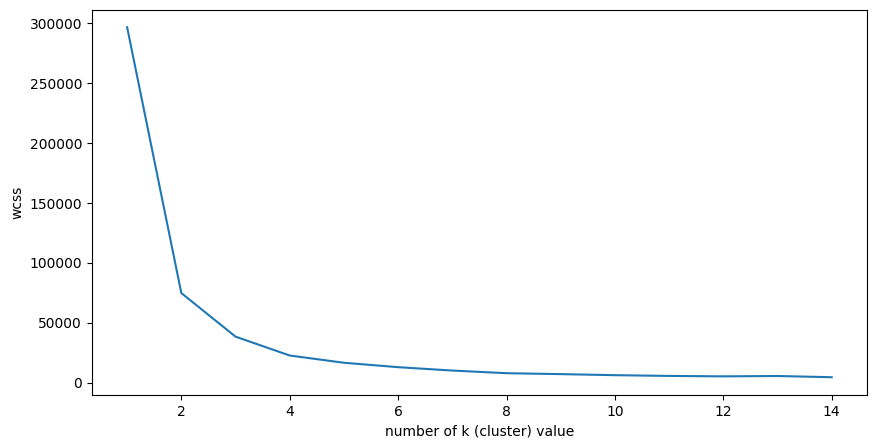

In [155]:
#define k value
wcss = []
data_model = df.drop(['Gender','VisitFrequency'],axis=1)
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

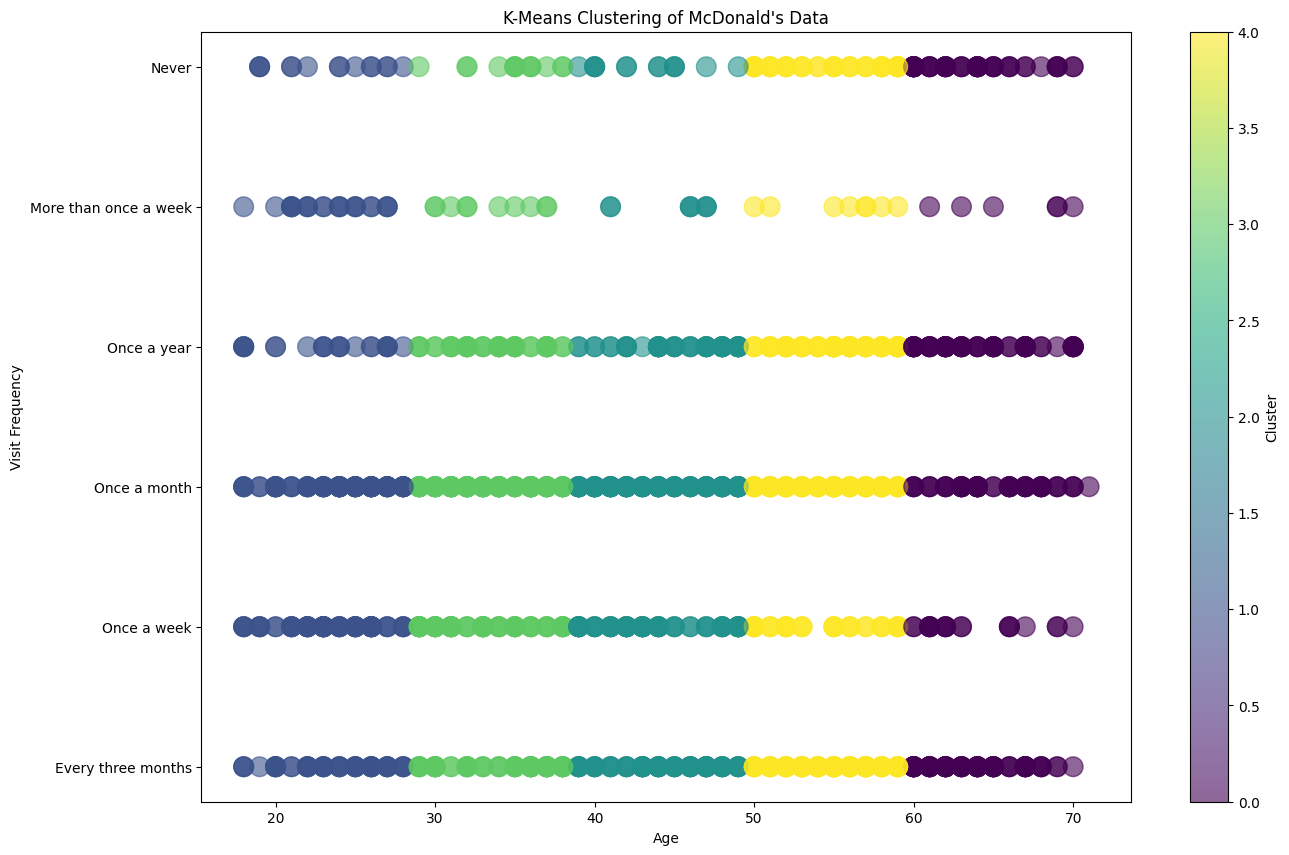

In [156]:
# Create and fit the K-Means model
kmeans = KMeans(n_clusters=5, random_state=0)
data_predict = kmeans.fit_predict(numeric_data) 

df['KMeans_Cluster'] = data_predict

# Plotting the clusters
plt.figure(figsize=(15, 10))
plt.scatter(x=df['Age'], y=df['VisitFrequency'], c=df['KMeans_Cluster'], s=200, cmap='viridis', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Visit Frequency")
plt.title('K-Means Clustering of McDonald\'s Data')
plt.colorbar(label='Cluster')
plt.show()


#### Hierarchical Clustering Algorithm

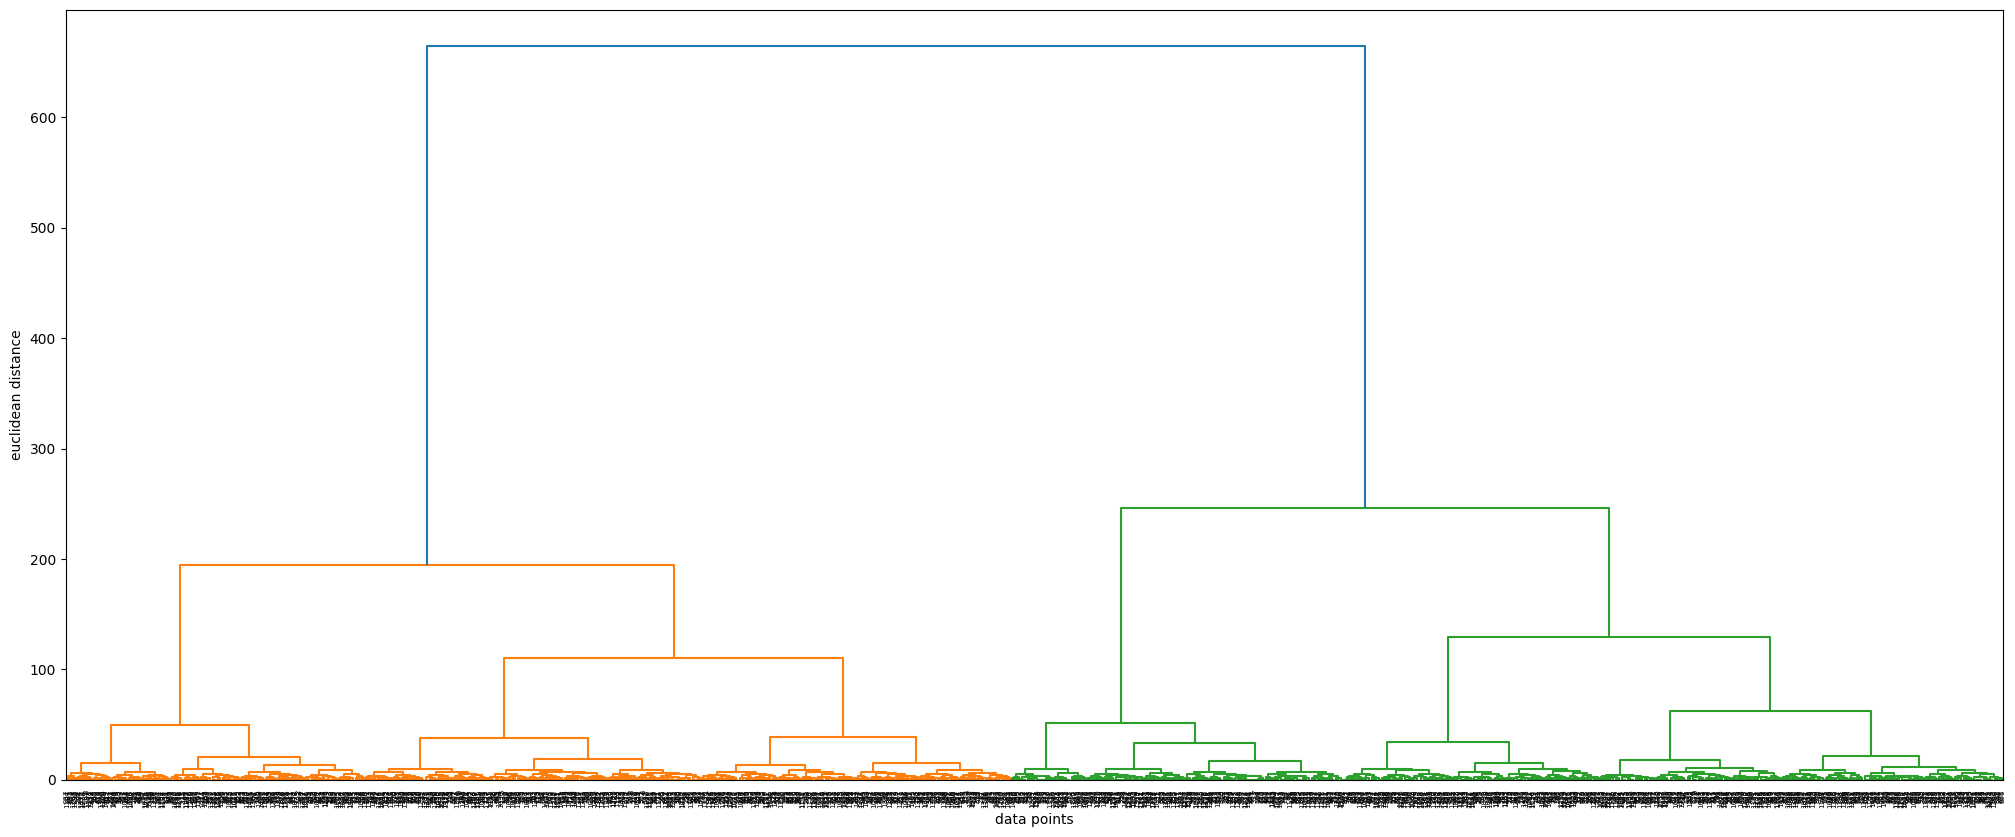

In [157]:
#create demogram and find the best clustering value
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

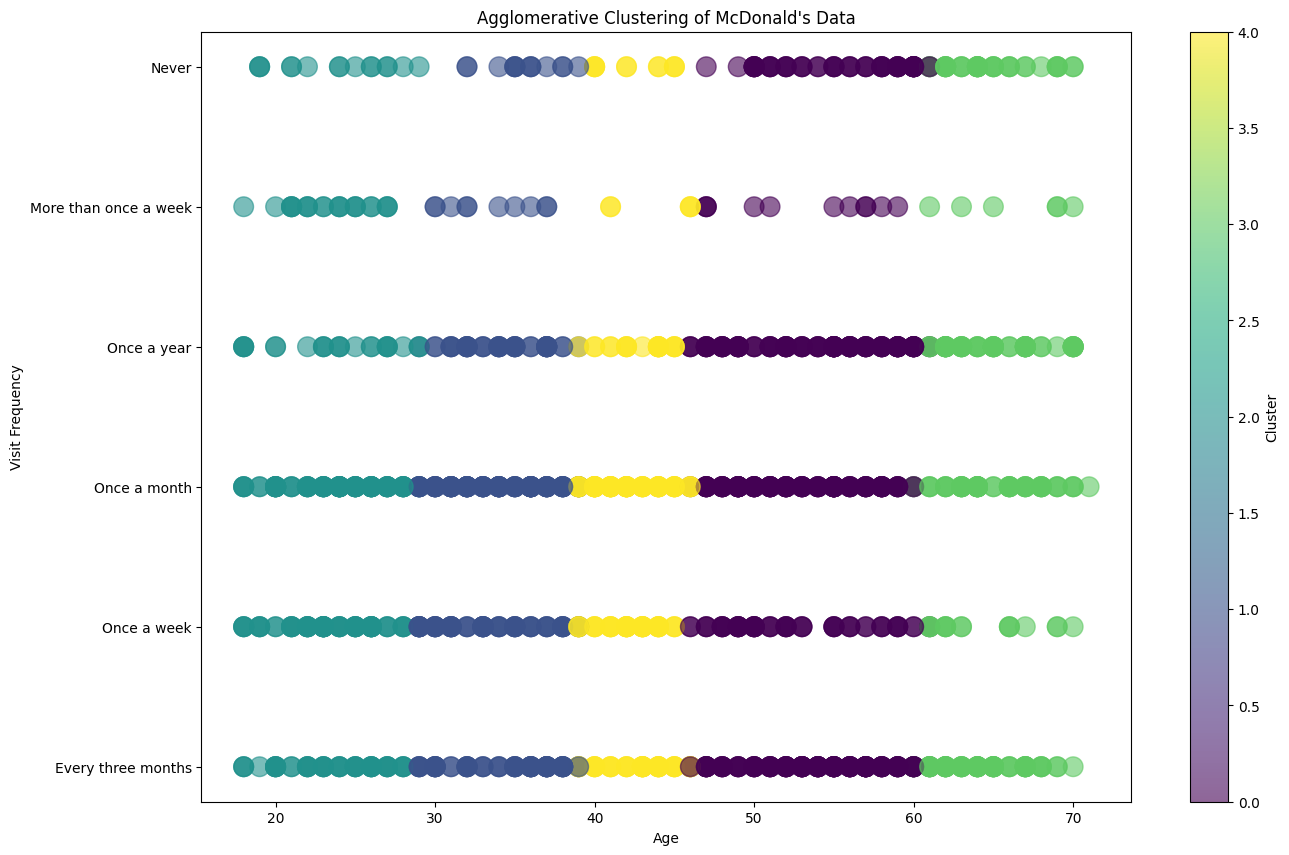

In [158]:
# Create and fit the AgglomerativeClustering model
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
data_predict = hierarchical_cluster.fit_predict(numeric_data)  

df['Agglomerative_Cluster'] = data_predict

plt.figure(figsize=(15, 10))
plt.scatter(x=df['Age'], y=df['VisitFrequency'], c=df['Agglomerative_Cluster'], s=200, cmap='viridis', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Visit Frequency")
plt.title('Agglomerative Clustering of McDonald\'s Data')
plt.colorbar(label='Cluster')
plt.show()
